<a href="https://colab.research.google.com/github/vanshid/DS-NN_For_Self-driving_car/blob/main/DEEPLEARNING_CNN_IMAGECLASSIFICATION_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras 
from keras.models import Sequential 
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import pickle
import pandas as pd
import numpy as np
import random 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/traffic-signs/signnames.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ClassId   43 non-null     int64 
 1   SignName  43 non-null     object
dtypes: int64(1), object(1)
memory usage: 816.0+ bytes


**Pickle for our testing, validating and training purposes**

In [ ]:
with open('/content/drive/MyDrive/traffic-signs/train.p', mode='rb') as training:
  train = pickle.load(training)
with open('/content/drive/MyDrive/traffic-signs/test.p', mode='rb') as testing:
  test = pickle.load(testing)
with open('/content/drive/MyDrive/traffic-signs/valid.p',mode='rb') as validation:
  valid = pickle.load(validation)

In [ ]:
obj = pd.read_pickle(r'/content/drive/MyDrive/traffic-signs/test.p')
print(obj)


{'sizes': array([[53, 54],
       [42, 45],
       [48, 52],
       ...,
       [29, 29],
       [48, 49],
       [32, 31]], dtype=uint8), 'coords': array([[ 6,  5, 48, 49],
       [ 5,  5, 36, 40],
       [ 6,  6, 43, 47],
       ...,
       [ 6,  6, 24, 24],
       [ 5,  6, 43, 44],
       [ 6,  5, 27, 26]], dtype=uint8), 'features': array([[[[116, 139, 174],
         [116, 137, 171],
         [118, 138, 172],
         ...,
         [ 98, 114, 143],
         [ 97, 121, 147],
         [ 85, 105, 130]],

        [[115, 142, 176],
         [115, 140, 174],
         [117, 141, 175],
         ...,
         [119, 143, 176],
         [120, 141, 173],
         [120, 139, 171]],

        [[117, 141, 174],
         [117, 142, 175],
         [114, 140, 172],
         ...,
         [120, 144, 179],
         [122, 144, 179],
         [120, 143, 177]],

        ...,

        [[117, 137, 167],
         [115, 134, 164],
         [117, 135, 164],
         ...,
         [115, 137, 169],
         [116,

In [ ]:
x_train, y_train = train['features'], train['labels']
x_validation, y_validation = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

In [ ]:
print(x_test.shape)
print(x_train.shape)
print(x_validation.shape)

(12630, 32, 32, 3)
(34799, 32, 32, 3)
(4410, 32, 32, 3)


In [ ]:
print(y_test.shape)
print(y_train.shape)
print(y_validation.shape)

(12630,)
(34799,)
(4410,)


**Visualisation for our x_'s**

Image Label = 10


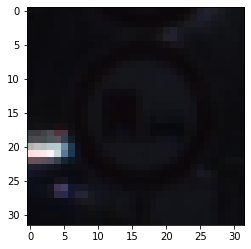

In [ ]:
index = np.random.randint(1,len(x_train))
plt.imshow(x_train[index])
print('Image Label = {}'.format(y_train[index]))


Image Label = 2


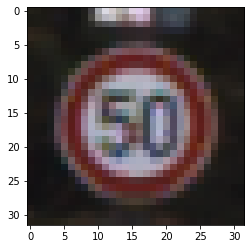

In [ ]:
index = np.random.randint(1,len(x_test))
plt.imshow(x_test[index])
print('Image Label = {}'.format(y_test[index]))


**Image Pre-Processing**

1.   Grey-scaling
2.   Histogram Equalisation
1.   Normalise


In [ ]:
from sklearn.utils import shuffle
x_train , y_train = shuffle(x_train,y_train)

**OPEN CV**

In [ ]:
def preprocessing(img):
  #Converting to greay-scale
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  #HE
  img = cv2.equalizeHist(img)
  #Img-Norm
  img = img/255
  return img


In [ ]:
#Applying pre-processing to all our images
x_train_processed = np.array(list(map(preprocessing,x_train)))
x_validation_processed = np.array(list(map(preprocessing,x_validation)))
x_test_processed = np.array(list(map(preprocessing,x_test)))

In [ ]:
x_train_processed = x_train_processed.reshape(34799,32,32,1)
x_validation_processed = x_validation_processed.reshape(4410,32,32,1)
x_test_processed = x_test_processed.reshape(12630,32,32,1)

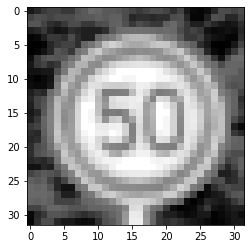

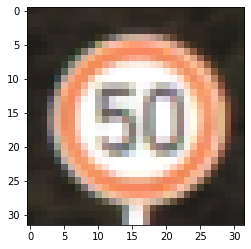

In [ ]:
i = random.randint(1,len(x_train))
plt.imshow(x_train_processed[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(x_train[i].squeeze())

**Building our CNN model using Keras**

In [ ]:
model = Sequential()

**Adding the Convolutional Model**

In [ ]:
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,1)))
#Pooling our layer with MaxPool
model.add(MaxPooling2D(pool_size=(2,2)))

**Placing a drop-out layer**

In [ ]:
model.add(Dropout(0.25))

**Adding another CN Layer**

In [ ]:
model.add(Conv2D(64,(5,5),activation='relu'))
#Pooling 
model.add(MaxPooling2D(pool_size=(2,2)))
#Flatten into 1-d
model.add(Flatten())


**Adding a Dense Layer**

In [ ]:
model.add(Dense(256,activation='relu'))

**Placing our Drop-out layer**

In [ ]:
model.add(Dropout(0.5))

**Defining our Output Layer of our NN**

In [ ]:
model.add(Dense(43,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               4

**#Compling our model with Adam of keras optimizers**

In [ ]:
model.compile(Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

**Training our model, to re-train just change epoch values**

In [ ]:
history = model.fit(x_train_processed, y_train,batch_size=500,epochs=70,verbose=7,validation_data=(x_validation_processed,y_validation))

Epoch 1/70
Epoch 2/70
Epoch 3/70
Epoch 4/70
Epoch 5/70
Epoch 6/70
Epoch 7/70
Epoch 8/70
Epoch 9/70
Epoch 10/70
Epoch 11/70
Epoch 12/70
Epoch 13/70
Epoch 14/70
Epoch 15/70
Epoch 16/70
Epoch 17/70
Epoch 18/70
Epoch 19/70
Epoch 20/70
Epoch 21/70
Epoch 22/70
Epoch 23/70
Epoch 24/70
Epoch 25/70
Epoch 26/70
Epoch 27/70
Epoch 28/70
Epoch 29/70
Epoch 30/70
Epoch 31/70
Epoch 32/70
Epoch 33/70
Epoch 34/70
Epoch 35/70
Epoch 36/70
Epoch 37/70
Epoch 38/70
Epoch 39/70
Epoch 40/70
Epoch 41/70
Epoch 42/70
Epoch 43/70
Epoch 44/70
Epoch 45/70
Epoch 46/70
Epoch 47/70
Epoch 48/70
Epoch 49/70
Epoch 50/70
Epoch 51/70
Epoch 52/70
Epoch 53/70
Epoch 54/70
Epoch 55/70
Epoch 56/70
Epoch 57/70
Epoch 58/70
Epoch 59/70
Epoch 60/70
Epoch 61/70
Epoch 62/70
Epoch 63/70
Epoch 64/70
Epoch 65/70
Epoch 66/70
Epoch 67/70
Epoch 68/70
Epoch 69/70
Epoch 70/70


**Evaluating the performance of our CNN model**

In [ ]:
score = model.evaluate(x_test_processed,y_test)
print("The test accuracy is:",score[1])

395/395 [==============================] - 6s 15ms/step - loss: 0.2720 - accuracy: 0.9297
The test accuracy is: 0.9296911954879761


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Data Visualisation & idea about overfitting**

Text(0.5, 0, 'Epochs')

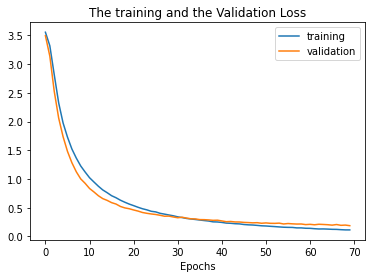

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('The training and the Validation Loss')
plt.xlabel('Epochs')

Text(0.5, 0, 'Epochs')

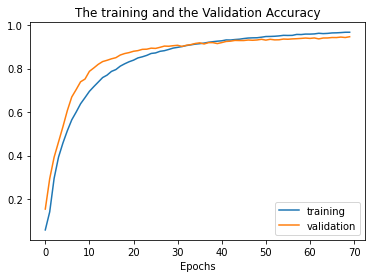

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('The training and the Validation Accuracy')
plt.xlabel('Epochs')

In [ ]:
prediction = model.predict(x_test_processed).argmax(axis=1)
y_true_label = y_test

**Visualising of our model in Matrix**

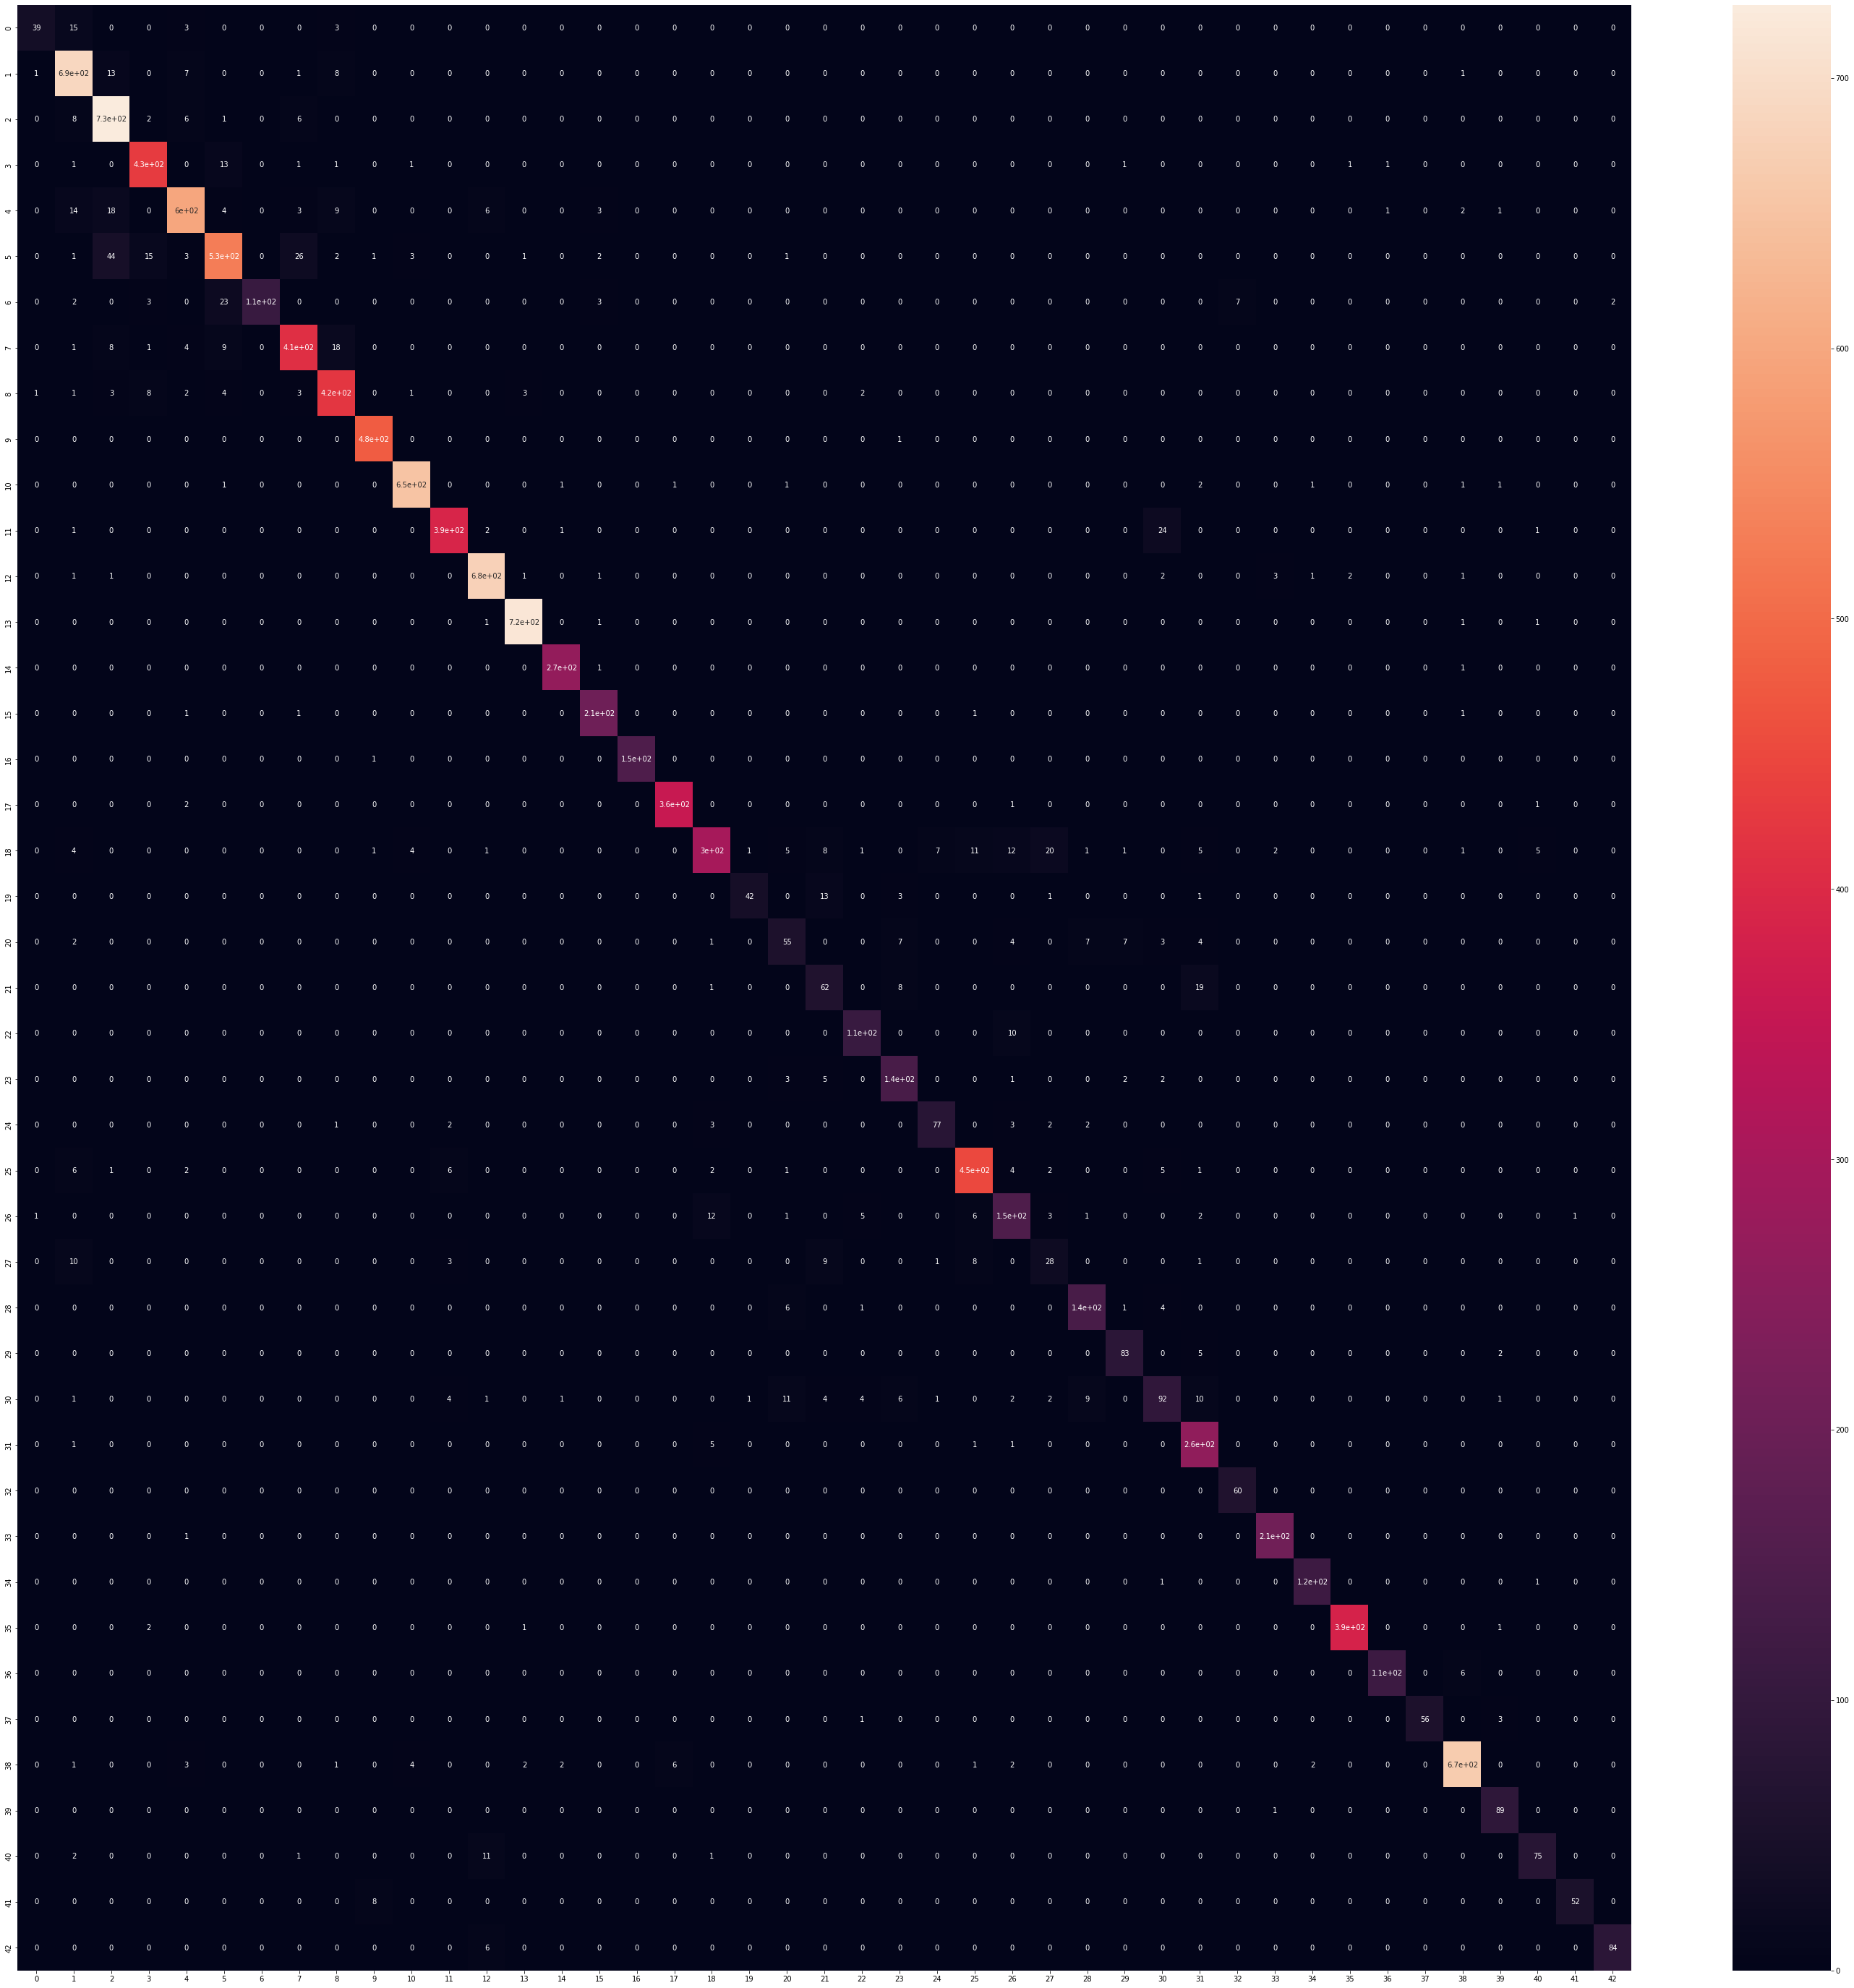

In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_true_label,prediction)
plt.figure(figsize=(50,50))
sns.heatmap(matrix,annot=True)

**Image Classification with True values and labeling our images accordingly**

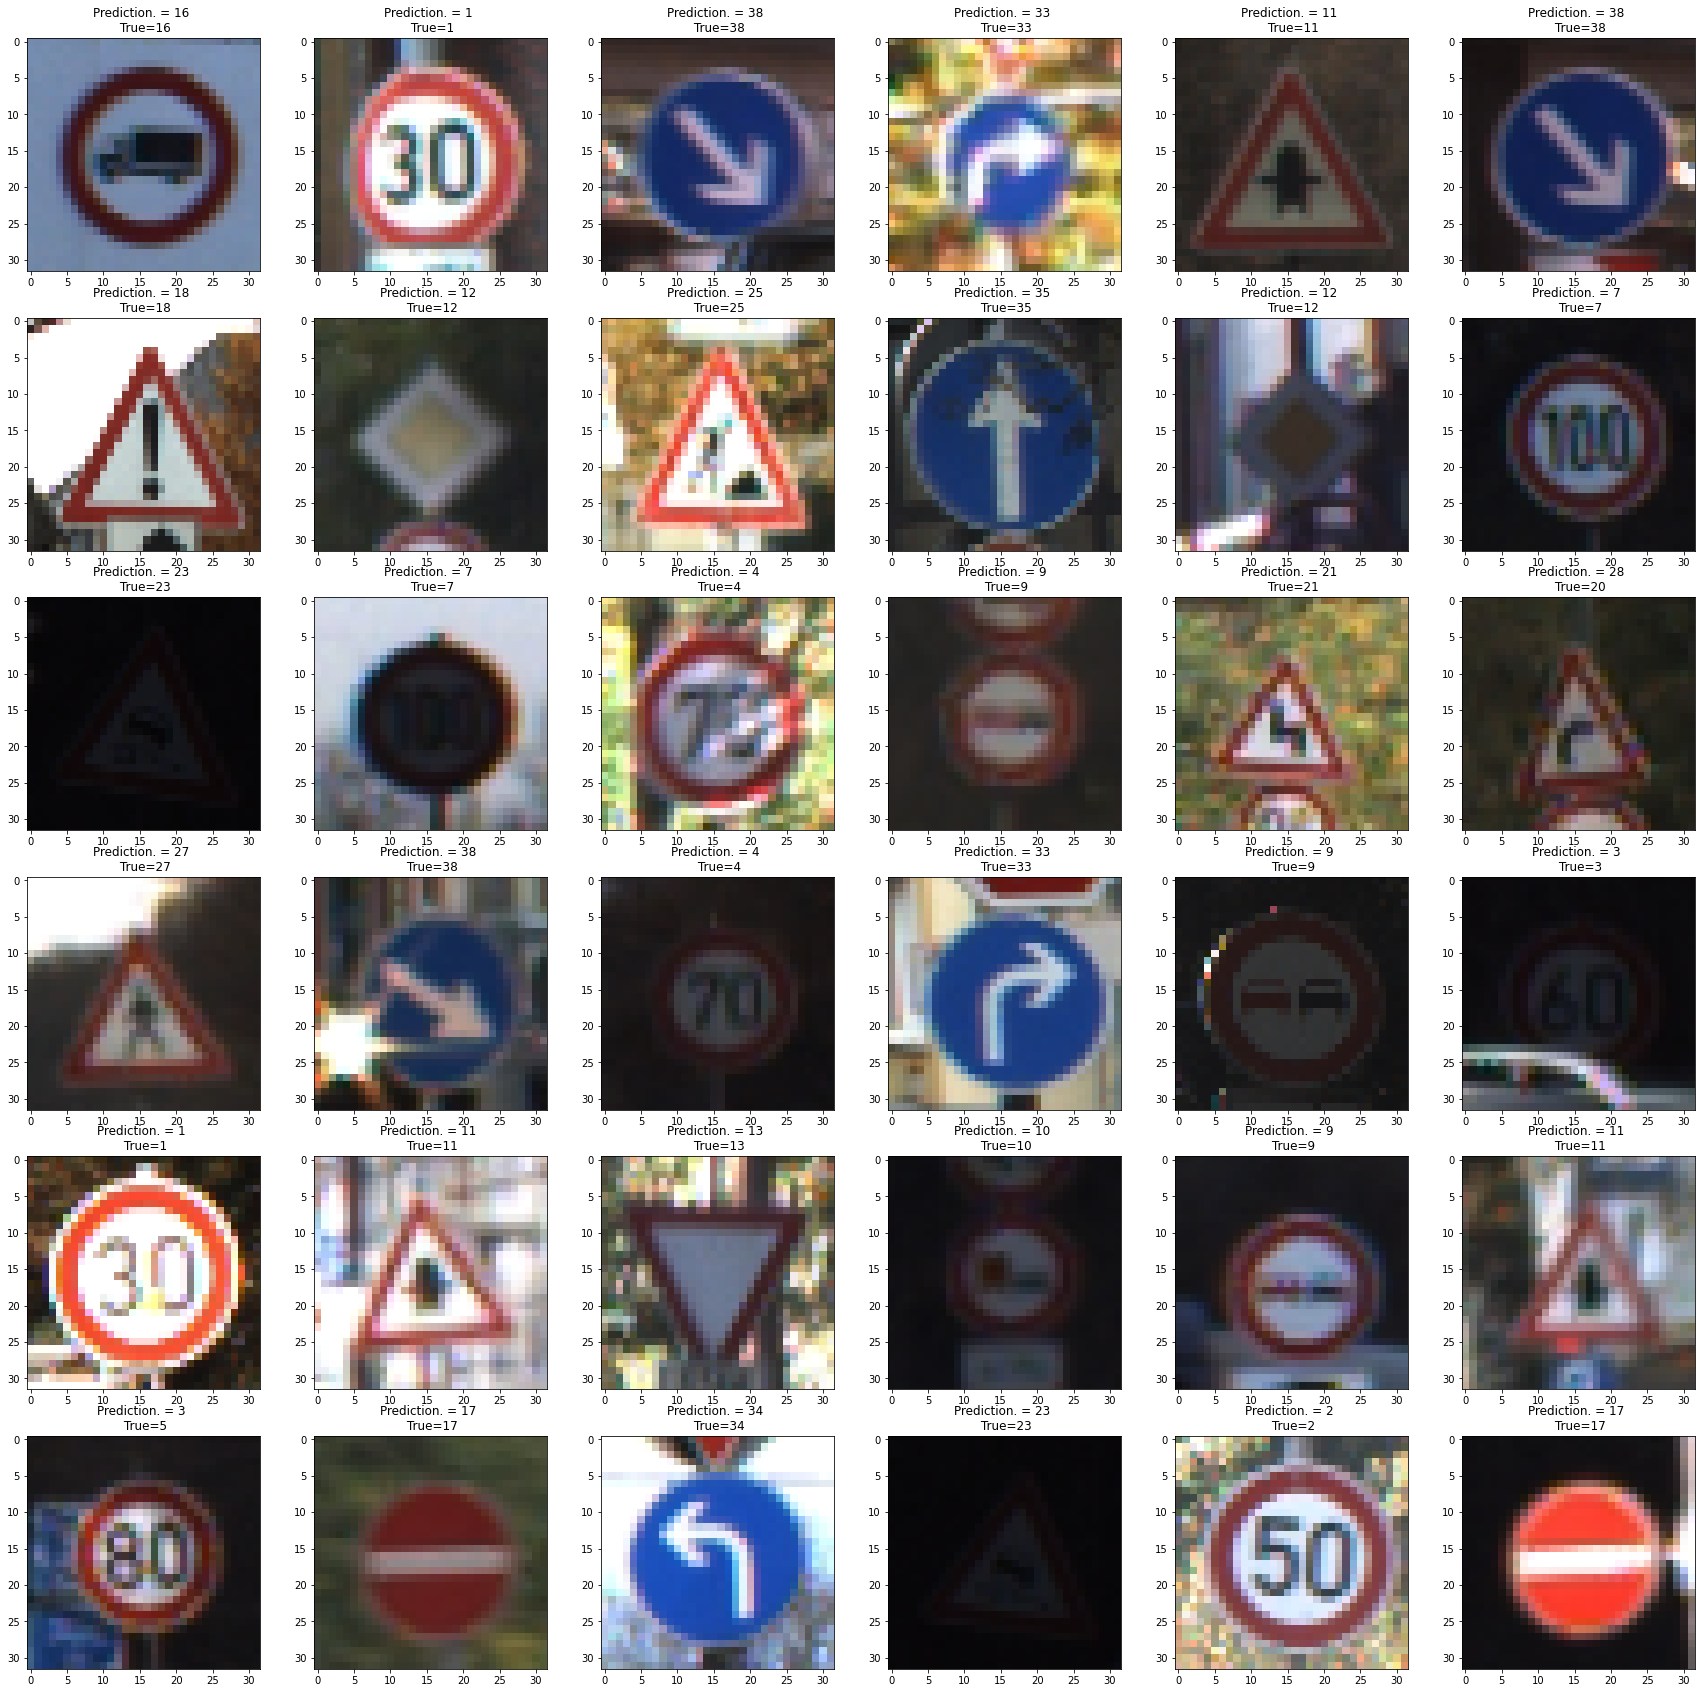

In [ ]:
l = 6
w = 6
fig, axes = plt.subplots(l,w,figsize=(30,30))
axes = axes.ravel()
for i in range(0,l*w):
  axes[i].imshow(x_test[i])
  axes[i].set_title("Prediction. = {} \n True={}".format(prediction[i],y_true_label[i]))


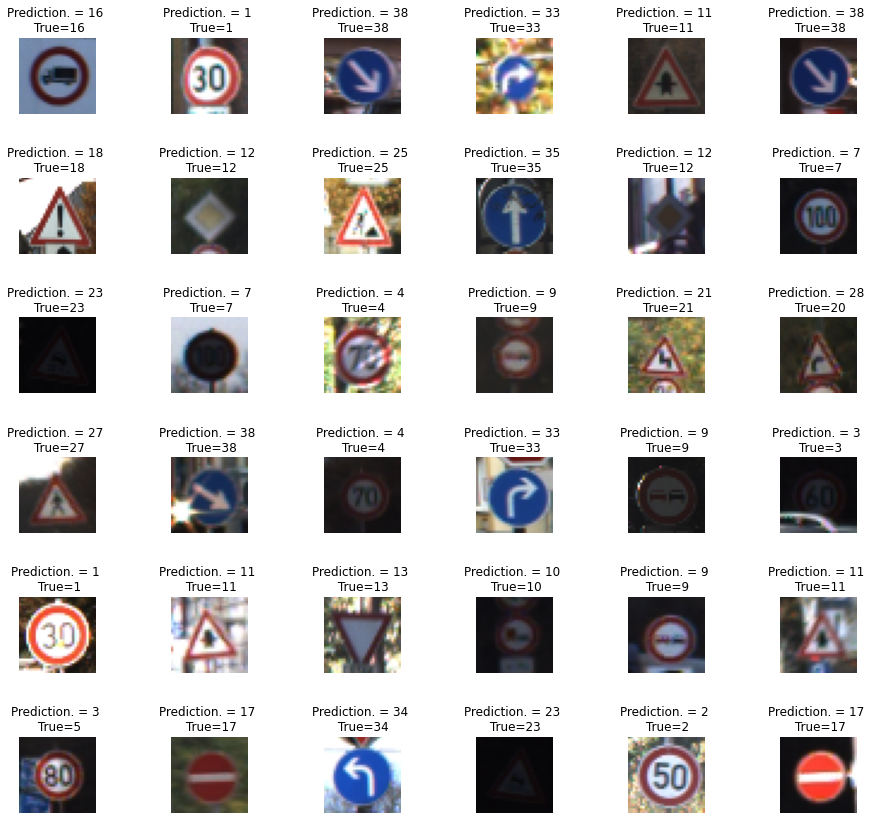

In [ ]:
l = 6
w = 6
fig, axes = plt.subplots(l,w,figsize=(15,15))
axes = axes.ravel()
for i in range(0,l*w):
  axes[i].imshow(x_test[i])
  axes[i].set_title("Prediction. = {} \n True={}".format(prediction[i],y_true_label[i]))
  axes[i].axis('Off')
plt.subplots_adjust(wspace=1)

In [ ]:
model.save('My_CNN_MODEL.h5')